# 3-3. 데이터 정제
데이터 정제 = 데이터 분석에 앞서 전처리가 완료된 데이터에 대해 빈값(결측치)이나 정상범위를 벗어난 값(이상치) 들을 제거/다른값으로 대체하는 처리

# #01. 결측치
비어있는 값 (DB에서의 NULL과 비슷)

현장에서 만들어진 실제 데이터는 수집과정에서 발생한 오류로 인해 결측치를 포함하고 있는 경우가 多

결측치가 있으면 통계 처리 함수가 적용되지 않거나 분석 결과 왜곡 문제 발생

## 1) 결측치를 처리하는 대표적인 방법
1. 결측치 소거법
    - 결측치가 포함된 행/열을 제거하는 방법
    - 결측치가 포함된 데이터가 적은 경우 상관없으나 결측치가 많으면 결과 왜곡 발생 가능
2. 결측치 대체법
    - 결측치에 대표값이나 기술 통계값을 적용하는 방법

## 2) 필요한 기본 패키지와 샘플 데이터 준비
### a) 패키지 가져오기

In [1]:
pip install --upgrade sklearn

  Running setup.py install for sklearn: started
    Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
from pandas import DataFrame
from pandas import read_csv
from pandas import merge #열단위 병합기능 제공
from matplotlib import pyplot
from sklearn.impute import SimpleImputer  #통계기반 결측치 정제를 위한 클래스
import numpy

### b) 샘플 데이터 가져오기

In [3]:
성적표csv = read_csv('http://itpaper.co.kr/demo/py/grade.csv', encoding="euc-kr")
성적표csv

,이름,학년,성별,국어,영어,수학,과학
0,철수,1,남자,98,NaN,88.0,64.0
1,영희,2,여자,88,90.0,62.0,72.0
2,민수,1,남자,92,70.0,NaN,NaN
3,수현,3,여자,63,60.0,31.0,70.0
4,호영,4,남자,120,50.0,NaN,88.0


## 3) 데이터 전처리
### a) 인덱스 컬럼 지정

In [4]:
성적표 = 성적표csv.set_index("이름")
성적표

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


# #02. 결측치 확인하기
## 1) 각 데이터의 결측치 여부 확인
- 각 열에 대해 결측치가 아닐경우 False, 결측치는 True로 표시
- isnull() 함수도 같은 기능

In [5]:
결측치여부 = 성적표.isna()
결측치여부

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,False,False,False,True,False,False
영희,False,False,False,False,False,False
민수,False,False,False,False,True,True
수현,False,False,False,False,False,False
호영,False,False,False,False,True,False


## 2) 각 열별로 결측치 수 파악하기
isna() 함수나 isnull() 함수로 도출된 데이터프레임의 열별로 합계를 수행하면 True는 1, False는 0으로 계산

In [6]:
결측치합계 = 결측치여부.sum()
결측치합계

학년    0
성별    0
국어    0
영어    1
수학    2
과학    1
dtype: int64

# #03. 결측치 소거
## 1) 결측치가 포함된 모든 행 삭제
- 원본은 변화X, 삭제 결과가 리턴
- inplace=True 파라미터를 적용할 경우 리턴값 없이 원본에 즉시 반영

### 행에 포함된 값 중 하나라도 결측치인 경우 삭제

In [7]:
nal = 성적표.dropna()
nal

,학년,성별,국어,영어,수학,과학
이름,,,,,,
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


### 특정 컬럼에 대한 결측치만 제거하기
dropna() 함수는 간단한 장점이 있으나 분석에 필요한 행까지 손실될 우려가 있다.

subset 파라미터에 정제를 적용할 컬럼이름 리스트 형태로 나열시하여 원하는 컬럼에 대해서만 적용 가능

In [9]:
na2 = 성적표.dropna(subset=['수학'])
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
수현,3,여자,63,60.0,31.0,70.0


### 행에 포함된 모든 값이 결측치인 경우만 삭제
삭제될 가능성이 매우 적다.

In [10]:
na2 = 성적표.dropna(how='all')
na2

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


## 2) 결측치가 포함된 모든 열 삭제
### 열에 포함된 값 중 하나라도 결측치인 경우 삭제 
axis=1 파라미터 => y축(컬럼)에 대해 적용

In [11]:
na3 = 성적표.dropna(axis=1)
na3

,학년,성별,국어
이름,,,
철수,1,남자,98
영희,2,여자,88
민수,1,남자,92
수현,3,여자,63
호영,4,남자,120


### 열에 포함된 모든 값이 결측치인 경우 삭제

In [12]:
na4 = 성적표.dropna(how='all', axis=1)
na4

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,NaN,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,NaN,NaN
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,NaN,88.0


# #04. 결측치 대체
## 1) 대표값으로 대체하기
- 원본은 변화 없음, 대체결과 리턴
- inplace=True 파라미터를 적용할 경우 리턴값 없이 원본에 즉시 반영

In [14]:
대표값_대체 = 성적표.fillna(value=50)
대표값_대체

,학년,성별,국어,영어,수학,과학
이름,,,,,,
철수,1,남자,98,50.0,88.0,64.0
영희,2,여자,88,90.0,62.0,72.0
민수,1,남자,92,70.0,50.0,50.0
수현,3,여자,63,60.0,31.0,70.0
호영,4,남자,120,50.0,50.0,88.0


## 2) 통계분석 기법으로 대체하기
### 결측치를 정제할 규칙 정의
strategy 옵션 : mean=평균 / median=중앙값 / most_frequent:최빈값(가장 많이 관측되는 수)

In [17]:
# 각 열 단위로 평균(strategy='mean')을 결측치 missing_values에 지정
정제규칙 = SimpleImputer(missing_values=numpy.nan, strategy='mean')
정제규칙

SimpleImputer()

### 결측치를 정제해야 하는 컬럼만 추출
숫자형식이 아닌 컬럼은 mean이나 median을 사용 불가능!

In [19]:
정제대상 = 성적표.filter(['국어', '수학', '영어', '과학'])
정제대상

,국어,수학,영어,과학
이름,,,,
철수,98,88.0,NaN,64.0
영희,88,62.0,90.0,72.0
민수,92,NaN,70.0,NaN
수현,63,31.0,60.0,70.0
호영,120,NaN,50.0,88.0


### 정의된 규칙을 데이터프레임의 값들만 추출해서 적용
규칙이 적용된 2차배열 반환

In [21]:
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[ 98.        ,  88.        ,  67.5       ,  64.        ],
       [ 88.        ,  62.        ,  90.        ,  72.        ],
       [ 92.        ,  60.33333333,  70.        ,  73.5       ],
       [ 63.        ,  31.        ,  60.        ,  70.        ],
       [120.        ,  60.33333333,  50.        ,  88.        ]])

### 적용된 규칙으로 새로운 데이터프레임 생성
원본 데이터프레임에서 인덱스 이름과 컬럼 이름을 가져와 적용해준다.

In [22]:
결측치정제 = DataFrame(정제규칙_적용결과,
                 index = 정제대상.index,
                 columns=정제대상.columns)
결측치정제

,국어,수학,영어,과학
이름,,,,
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,120.0,60.333333,50.0,88.0


### 정제과정에서 제외된 컬럼과 병합
제외된 컬럼만 추출하기

In [23]:
tmp = 성적표.filter(['학년', '성별'])
tmp

,학년,성별
이름,,
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


추출된 컬럼과 정제결과를 병합하기

In [24]:
결측치완료 = merge(tmp, 결측치정제, left_index=True, right_index=True)
결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,120.0,60.333333,50.0,88.0


# #05. 이상치(극단치) 정제
정상적인 범위를 벗어나 극단적으로 크거나 작은 값

실제로 존재하는 값일 수도 있지만 데이터 측정과정에서의 오류로 인해 발생하기도 하므로 이상치를 삭제/정상범위 값으로 대체 후 데이터분석 진행

이상치(극단치) 제거를 위해 먼저 어디까지를 정상 범위로 볼 것인가에 대한 정의 필요

1. <b>논리적으로 판단하여 정하기 </b>
    - ex) 성인의 몸무게가 40~150kg를 벗어나는 경우는 상당이 드물 것으로 판단, 이 범위를 벗어나면 극단치로 간주
    - 데이터 분석가의 주관에 따른다.
2. <b>통계적인 기준을 이용하기 </b>
    - 상하위 0.3% 또는 +-3 표준편차에 해당할만큼 극단적으로 크거나 작으면 극단치로 간주하는 방법

### 이상치 정제과정
이상치 확인 > 이상치를 결측치로 변환 > 결측치 정제과정 적용

## 1) 이상치 존재 여부 확인하기를 위해 박스플롯 표시
이상치를 원으로 표현하므로 한눈에 확인 가능

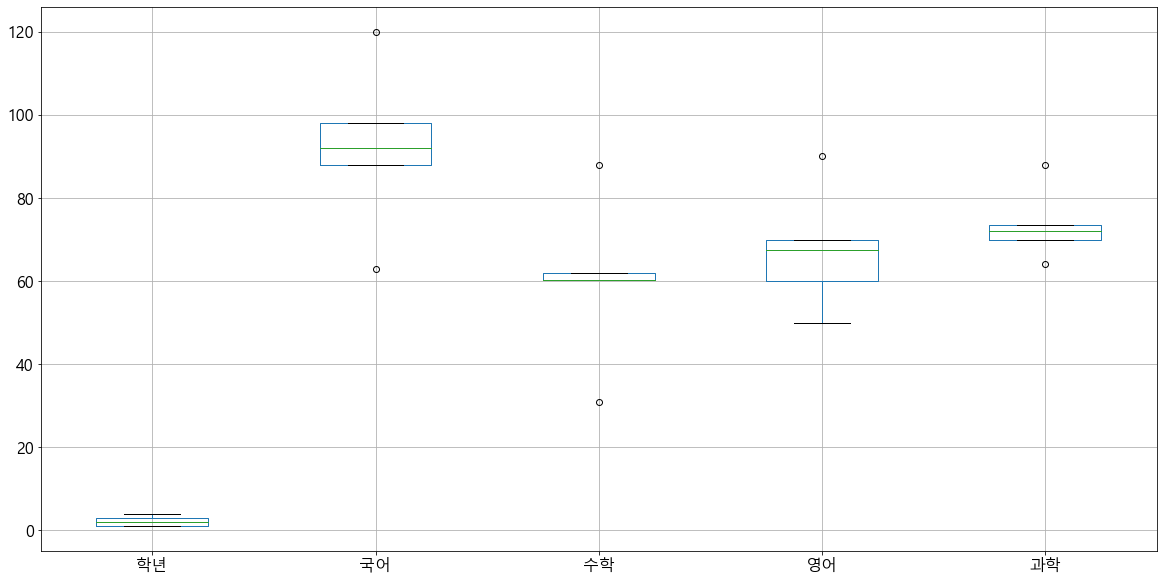

In [26]:
# 앞에서 1차적으로 정제한 결과를 활용하여 진행
pyplot.rcParams['font.family'] = 'Malgun Gothic'
pyplot.rcParams['font.size'] = 16
pyplot.rcParams['figure.figsize'] = (20,10)   
결측치완료.boxplot()
pyplot.show()

## 2) 이상치를 결측치로 변경하기
### 국어점수에 대한 이상치 필터링

In [27]:
이상치데이터 = 결측치완료.query('국어>100')
이상치데이터

,학년,성별,국어,수학,영어,과학
이름,,,,,,
호영,4,남자,120.0,60.333333,50.0,88.0


### 필터링된 이상치 데이터에 대한 인덱스 추출

In [28]:
이상치인덱스 = list(이상치데이터.index)
이상치인덱스

['호영']

### 이상치를 갖는 인덱스에 대한 국어점수를 결측치로 변경

In [29]:
for i in 이상치인덱스:
    결측치완료.loc[i, '국어'] = numpy.nan
결측치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.0,88.000000,67.5,64.0
영희,2,여자,88.0,62.000000,90.0,72.0
민수,1,남자,92.0,60.333333,70.0,73.5
수현,3,여자,63.0,31.000000,60.0,70.0
호영,4,남자,NaN,60.333333,50.0,88.0


## 3) 변경된 결측치 정제
### 결측치를 정제할 규칙 정의

In [30]:
# 결측치에 대해 평균점수 부여
정제규칙 = SimpleImputer(missing_values=numpy.nan, strategy='mean')

### 결측치를 정제해야 하는 컬럼만 추출
숫자형식이 아닌 컬럼은 mean이나 median을 사용할 수 없다

In [31]:
정제대상 = 결측치완료.filter(['국어', '수학', '영어', '과학'])
정제대상

,국어,수학,영어,과학
이름,,,,
철수,98.0,88.000000,67.5,64.0
영희,88.0,62.000000,90.0,72.0
민수,92.0,60.333333,70.0,73.5
수현,63.0,31.000000,60.0,70.0
호영,NaN,60.333333,50.0,88.0


### dataframe의 값에 대해 규칙 적용

In [32]:
정제규칙_적용결과 = 정제규칙.fit_transform(정제대상.values)
print(type(정제규칙_적용결과))
정제규칙_적용결과

<class 'numpy.ndarray'>


array([[98.        , 88.        , 67.5       , 64.        ],
       [88.        , 62.        , 90.        , 72.        ],
       [92.        , 60.33333333, 70.        , 73.5       ],
       [63.        , 31.        , 60.        , 70.        ],
       [85.25      , 60.33333333, 50.        , 88.        ]])

### 적용된 규칙으로 새로운 데이터 프레임 생성
원본 데이터 프레임에서 인덱스 이름과 컬럼 이름을 가져와 적용해준다.

In [33]:
이상치정제 = DataFrame(정제규칙_적용결과,
                 index = 정제대상.index,
                 columns=정제대상.columns)
이상치정제

,국어,수학,영어,과학
이름,,,,
철수,98.00,88.000000,67.5,64.0
영희,88.00,62.000000,90.0,72.0
민수,92.00,60.333333,70.0,73.5
수현,63.00,31.000000,60.0,70.0
호영,85.25,60.333333,50.0,88.0


### 정제 과정에서 제외된 컬럼과 병합
제외된 컬럼만 추출하기

In [34]:
tmp = 성적표.filter(['학년', '성별'])
tmp

,학년,성별
이름,,
철수,1,남자
영희,2,여자
민수,1,남자
수현,3,여자
호영,4,남자


추출된 컬럼과 정제결과를 병합하기

In [35]:
이상치완료 = merge(tmp, 이상치정제, left_index=True, right_index=True)
이상치완료

,학년,성별,국어,수학,영어,과학
이름,,,,,,
철수,1,남자,98.00,88.000000,67.5,64.0
영희,2,여자,88.00,62.000000,90.0,72.0
민수,1,남자,92.00,60.333333,70.0,73.5
수현,3,여자,63.00,31.000000,60.0,70.0
호영,4,남자,85.25,60.333333,50.0,88.0
